# Data Science for Public Good
## Zoo Station: Job Automation

#### First we load in the different Python packages that will help us visualize our data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Duplicate key in file PosixPath('/Users/agurvich/.matplotlib/stylelib/ABG_black_presentation.mplstyle'), line 9 ('axes.edgecolor : w')


#### Open the data using `pandas`. The data is an Excel spreadsheet saved as a "comma separated values" (.csv) format. `pandas` can open this filetype with its `read_csv` function.

In [2]:
full_dataset = pd.read_csv('prob_job_automation.csv',delimiter=',')

#### Visualize the `pandas` "dataframe" as a spreadsheet. Here we can see the first 5 and last 5 rows of the spreadsheet.
##### Questions:
1. What does each row represent? How many are there?
2. What does each column represent? How many are there?
3. What's good about this visualization method? What's bad?

In [3]:
full_dataset

,_ - rank,_ - code,prob,Average annual wage,education,occupation,short occupation,len,probability,numbEmployed,median_ann_wage,employed_may2016,average_ann_wage
0,624,51-4033,0.9500,34920.0,High school diploma or equivalent,"Grinding, Lapping, Polishing and Buffing Machi...","Tool setters, operators and tenders",35,0.9500,74600,32890.0,74600,34920.0
1,517,51-9012,0.8800,41450.0,High school diploma or equivalent,"Separating, Filtering, Clarifying, Precipitati...","Tool setters, operators and tenders",35,0.8800,47160,38360.0,47160,41450.0
2,484,41-4012,0.8500,68410.0,High school diploma or equivalent,"Sales Representatives, Wholesale and Manufactu...","Sales Representatives, Wholesale and Manufactu...",92,0.8500,1404050,57140.0,1404050,68410.0
3,105,53-1031,0.0290,59800.0,High school diploma or equivalent,First-Line Supervisors of Transportation and M...,Supervisors Transportation,26,0.0290,202760,57270.0,202760,59800.0
4,620,51-4072,0.9500,32660.0,High school diploma or equivalent,"Molding, Coremaking and Casting Machine Setter...","Molding, Coremaking and Casting Machine Setter...",89,0.9500,145560,30480.0,145560,32660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,259,27-2011,0.3700,71313.6,"Some college, no degree",Actors,Actors,6,0.3700,48620,33473.0,48620,71313.6
698,522,51-3011,0.8900,27110.0,No formal educational credential,Bakers,Bakers,6,0.8900,180450,25090.0,180450,27110.0
699,42,21-2011,0.0081,49450.0,Bachelor's degree,Clergy,Clergy,6,0.0081,49320,45740.0,49320,49450.0
700,669,41-9012,0.9800,36560.0,No formal educational credential,Models,Models,6,0.9800,4390,21870.0,4390,36560.0


#### One of the most useful things to do to data is to reorder it according to some important feature. In this case, we are interested in the probability that a job will be automated. In that case, we will sort the data from most likely to be automated to least. 
##### Questions:
1. Which column is the probability in? 
1. What does a probability of 1 mean? What does a probability of 0 mean? 
1. Which column describes the name of the job?
1. Do you notice any repeated columns? Why might there be repeated columns in the dataset?
1. Which job has the *highest* probability of being automated?
1. Which job has the *lowest* probability of being automated? 
1. Do you notice a trend in the 5 jobs *most* likely to be automated? What education is required? What is the annual wage?
1. Do you notice a trend in the 5 jobs *least* likely to be automated? What education is required? What is the annual wage?

In [4]:
sorted_full_dataset = full_dataset.sort_values('prob',ascending=False,inplace=False)
sorted_full_dataset

,_ - rank,_ - code,prob,Average annual wage,education,occupation,short occupation,len,probability,numbEmployed,median_ann_wage,employed_may2016,average_ann_wage
628,697,49-9064,0.9900,39720.0,High school diploma or equivalent,Watch Repairers,Watch Repairers,15,0.9900,1620,36740.0,1620,39720.0
534,692,25-4031,0.9900,34780.0,Postsecondary nondegree award,Library Technicians,Library Technicians,19,0.9900,93410,32890.0,93410,34780.0
69,694,51-9151,0.9900,31740.0,High school diploma or equivalent,Photographic Process Workers and Processing Ma...,Photographic Process Workers and Processing Ma...,61,0.9900,26430,26470.0,26430,31740.0
541,693,43-4141,0.9900,36480.0,High school diploma or equivalent,New Accounts Clerks,New Accounts Clerks,19,0.9900,41630,34990.0,41630,36480.0
209,701,23-2093,0.9900,51490.0,High school diploma or equivalent,"Title Examiners, Abstractors and Searchers","Title Examiners, Abstractors and Searchers",42,0.9900,54560,45800.0,54560,51490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,5,29-1181,0.0033,79290.0,Doctoral or professional degree,Audiologists,Audiologists,12,0.0033,12310,75980.0,12310,79290.0
148,4,21-1023,0.0031,47880.0,Bachelor's degree,Mental Health and Substance Abuse Social Workers,Mental Health and Substance Abuse Social Workers,48,0.0031,114040,42700.0,114040,47880.0
66,2,49-1011,0.0030,66730.0,High school diploma or equivalent,"First-Line Supervisors of Mechanics, Installer...","First-Line Supervisors of Mechanics, Installer...",61,0.0030,453330,63540.0,453330,66730.0
359,3,11-9161,0.0030,78060.0,Bachelor's degree,Emergency Management Directors,Emergency Management Directors,30,0.0030,9570,70500.0,9570,78060.0


#### Now that we have some idea of what the dataset tells us let's try making a chart to answer the same questions above.

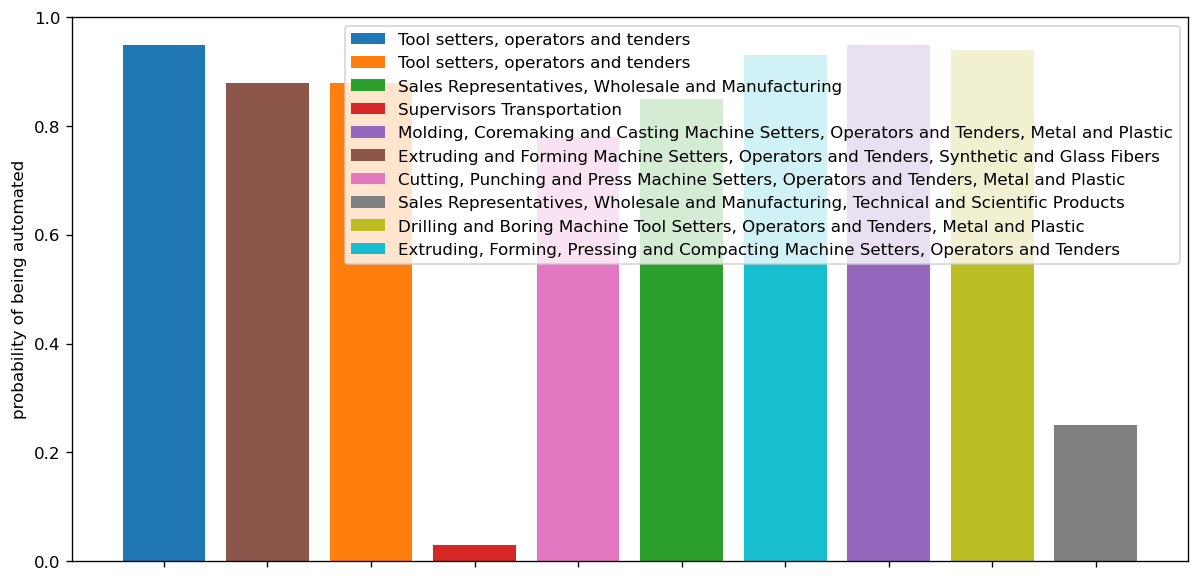

In [5]:
## make a bar chart
ys = full_dataset.iloc[:10]['prob']
xs = np.arange(len(ys)) ## x values for each bar

## make it extra hard to read the plot by mixing up the order of the bars relative to the legend
random.shuffle(xs)

## get the names for each job
xlabels = full_dataset.iloc[:10]['short occupation'].values

## plot a bar for each job
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    plt.bar(x,y,color='C%d'%i,label=label)

## set the x and y plot labels
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])
#ax.set_xticklabels(xlabels,rotation=-90)
ax.set_ylabel('probability of being automated')
ax.set_ylim(0,1)
ax.legend()
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

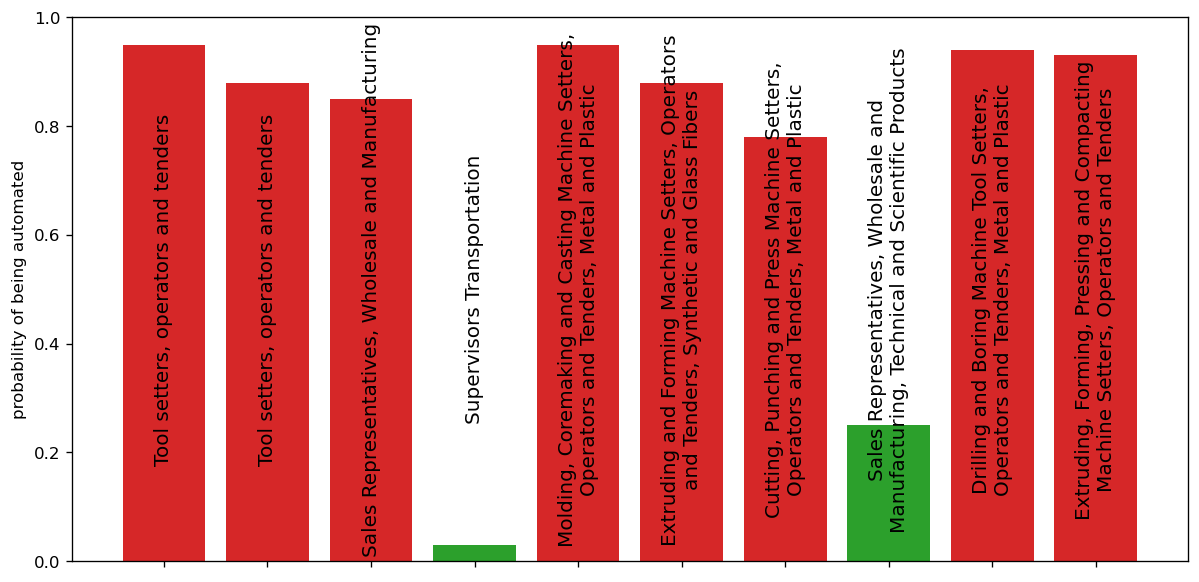

In [7]:
## make a bar chart

ys = full_dataset.iloc[:10]['prob']
xs = np.arange(len(ys)) ## dummy x values
xlabels = full_dataset.iloc[:10]['short occupation'].values
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
    
    ## if a label is too long, add a line break to the middle
    if len(label) > 50:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
    plt.text(x,0.5,label,rotation=90,ha='center',va='center',color='black',fontsize=12)

# set the x and y plot labels
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])
#ax.set_xticklabels(xlabels,rotation=-90)
ax.set_ylabel('probability of being automated')
ax.set_ylim(0,1)
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

<ipython-input-47-6efa24df6d73>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])


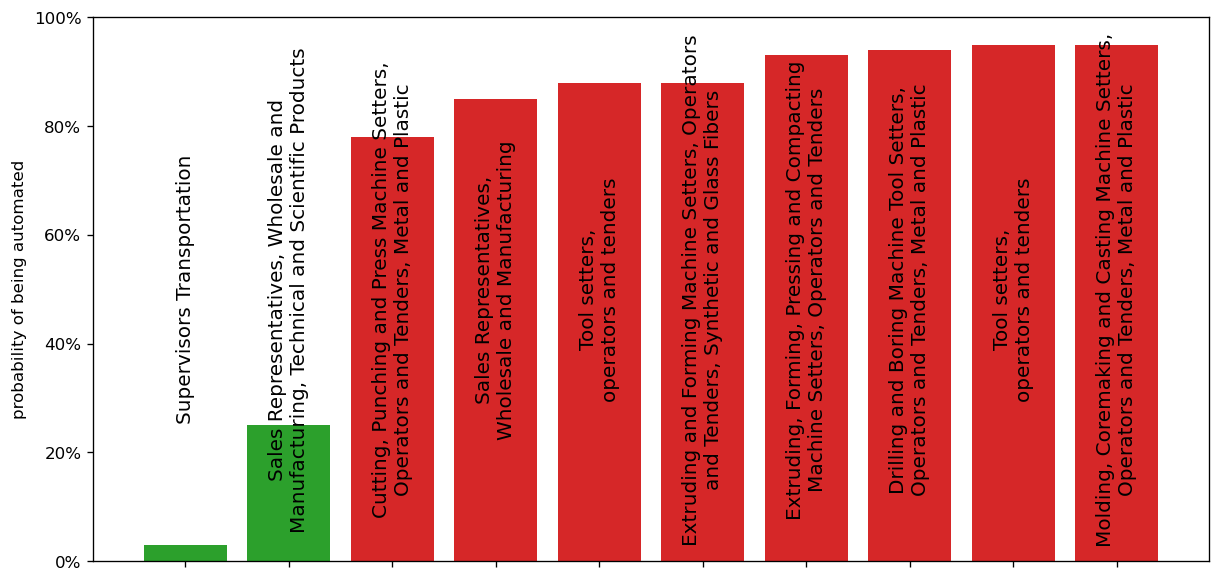

In [47]:
## make a bar chart

ys = full_dataset.iloc[:10]['prob'].to_numpy()

xs = np.argsort(np.argsort(ys))
#xs = xs[np.argsort(ys)]
xlabels = full_dataset.iloc[:10]['short occupation'].values
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
    
    ## if a label is too long, add a line break to the middle
    if len(label) > 30:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
    plt.text(x,0.5,label,rotation=90,ha='center',va='center',color='black',fontsize=12)

# set the x and y plot labels
ax = plt.gca()
ax.set_xticks(np.arange(len(ys)))
ax.set_xticklabels([])
#ax.set_xticklabels(xlabels,rotation=-90)
ax.set_ylabel('probability of being automated')
ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])
ax.set_ylim(0,1)
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

#### What science questions can we answer with the above plot? 

* Of the (randomly chosen) 10/702 jobs shown here, Supervisors Transportation is the least likely to be automated, then Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products.

#### What does this visualization teach us about our dataset? 

* Tool setters, operators and tenders appears multiple times in different fields
* There are common key-phrases "Operators and Tenders," "Wholesale and Manufacturing," "Metal and Plastic." These likely form some categories can be further partitioned into.  

In [143]:

name_sorted = full_dataset.sort_values('short occupation')
occupations = name_sorted['short occupation'].values

splits = dict()

for occupation in occupations:
    this_split = occupation.replace(',','').split(' ')
    this_split = [key[1:] if key[0] == ' ' else key for key in this_split]
    for key in this_split:
        if key in splits:
            splits[key]+=1
        else:
            splits[key] = 1
    print(occupation,this_split)

Accountants and Auditors ['Accountants', 'and', 'Auditors']
Actors ['Actors']
Actuaries ['Actuaries']
Adhesive Bonding Machine Operators and Tenders ['Adhesive', 'Bonding', 'Machine', 'Operators', 'and', 'Tenders']
Administrative Law Judges, Adjudicators and Hearing Officers ['Administrative', 'Law', 'Judges', 'Adjudicators', 'and', 'Hearing', 'Officers']
Administrative Services Managers ['Administrative', 'Services', 'Managers']
Adult Basic and Secondary Education and Literacy Teachers and Instructors ['Adult', 'Basic', 'and', 'Secondary', 'Education', 'and', 'Literacy', 'Teachers', 'and', 'Instructors']
Advertising Sales Agents ['Advertising', 'Sales', 'Agents']
Advertising and Promotions Managers ['Advertising', 'and', 'Promotions', 'Managers']
Aerospace Engineering and Operations Technicians ['Aerospace', 'Engineering', 'and', 'Operations', 'Technicians']
Aerospace Engineers ['Aerospace', 'Engineers']
Agents and Business Managers of Artists, Performers and Athletes ['Agents', 'and'

In [147]:
keys = []
jobs = []
for key in list(splits.keys()):
    if key in ['and','of']:
        splits.pop(key)
        continue
    if splits[key] > 2 and 'All Other' != key:
        keys+=[key]
        jobs += [[]]
        for occupation in occupations:
            if key in occupation:
                if 'Hand' == key and 'Handl' in occupation:
                    continue
                jobs[-1]+=[occupation]

for key in keys:
    print(key,splits[key])

Machine 42
Operators 80
Tenders 37
Administrative 5
Officers 8
Services 4
Managers 27
Secondary 5
Education 10
Teachers 13
Instructors 3
Sales 11
Agents 11
Engineering 9
Operations 5
Technicians 47
Engineers 26
Artists 5
Agricultural 6
Inspectors 6
Food 13
Science 5
Traffic 3
Aircraft 3
Supervisors 19
Mechanics 11
Service 18
Systems 6
Assemblers 6
Specialists 16
Pilots 3
Drivers 6
Attendants 12
Animal 6
Control 3
Workers 56
Scientists 13
Trainers 3
Real 4
Estate 4
Architects 4
Civil 3
Drafters 3
Directors 6
Sports 3
Video 3
Equipment 25
Automotive 4
Related 7
Repairers 29
Installers 16
Collectors 3
Clerks 24
All 20
Other 27
Analysts 9
Bus 3
School 12
Special 3
Truck 5
Engine 3
Meat 3
Cutters 4
Purchasing 3
Farm 4
Products 3
Technologists 8
Middle 3
Masons 3
Finishers 5
Cooks 6
Chemical 4
Plant 6
System 5
Social 8
Examiners 4
Investigators 5
Cleaners 4
Metal 21
Clinical 3
Psychologists 3
Coating 3
Setters 26
Preparation 3
Including 6
Commercial 4
Industrial 7
Designers 6
Computer 12
Too

(array([22., 16.,  6.,  6.,  2.,  2.,  3.,  3.,  5.,  1.,  1.,  3.,  0.,
         2.]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 <BarContainer object of 14 artists>)

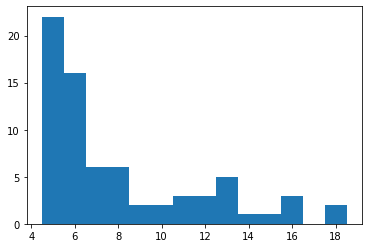

In [168]:
counts = [splits[key] for key in splits]
plt.hist(counts,bins=np.arange(5,20),align='left')

In [169]:
cook_mask = ['Cooks' in occupation for occupation in full_dataset['short occupation']]
cook_dataset = full_dataset[cook_mask].sort_values('numbEmployed',ascending=False)

<ipython-input-170-e2001359b8bb>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])


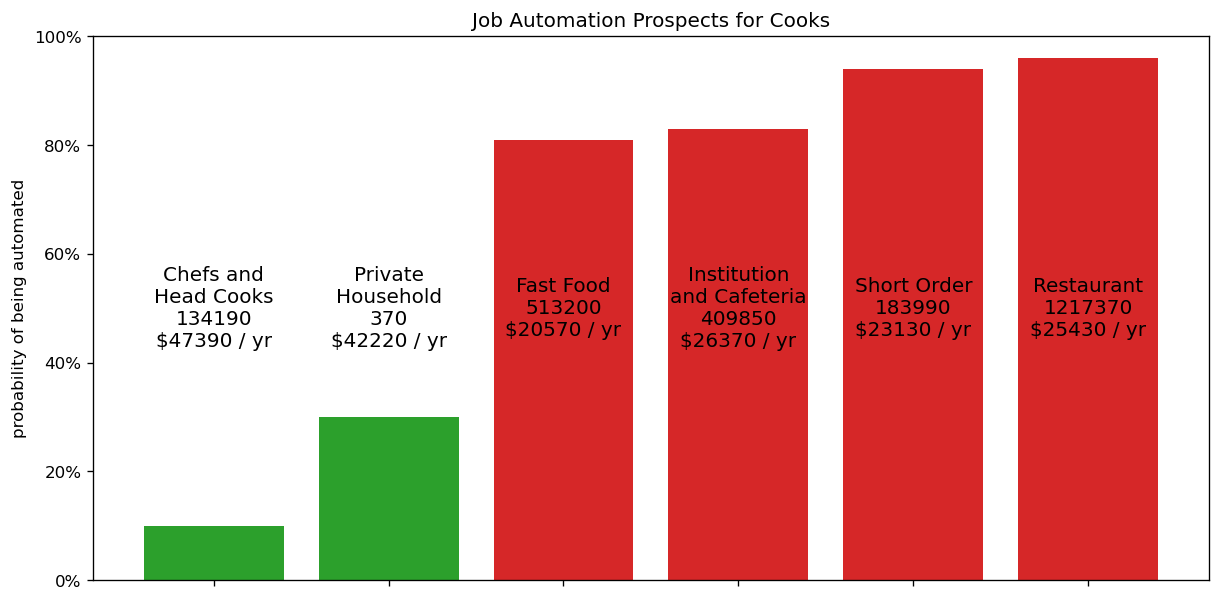

In [170]:
## make a bar chart

ys = cook_dataset.iloc[:10]['prob']
xs = np.argsort(np.argsort(ys)) ## dummy x values
xlabels = cook_dataset.iloc[:10]['short occupation'].values
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
    
    
    if 'Cooks, ' in label:
        label = label.split('Cooks, ')[1]
        
    if len(label) > 15:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
    label += '\n%d'%cook_dataset.iloc[i]['numbEmployed']
    label += '\n$%d / yr'%cook_dataset.iloc[i]['average_ann_wage']
    plt.text(x,0.5,label,rotation=0,ha='center',va='center',color='black',fontsize=12)

# set the x and y plot labels
ax = plt.gca()
ax.set_title('Job Automation Prospects for Cooks')
ax.set_xticks(np.arange(len(ys)))
ax.set_xticklabels([])
#ax.set_xticklabels(xlabels,rotation=-90)
ax.set_ylabel('probability of being automated')
ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])
ax.set_ylim(0,1)
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

In [172]:
cook_dataset
cook_dataset = cook_dataset.drop(index=445)

In [173]:
import copy

In [231]:
money = cook_dataset['average_ann_wage']*cook_dataset['numbEmployed']*cook_dataset['prob']
money = money.to_numpy()

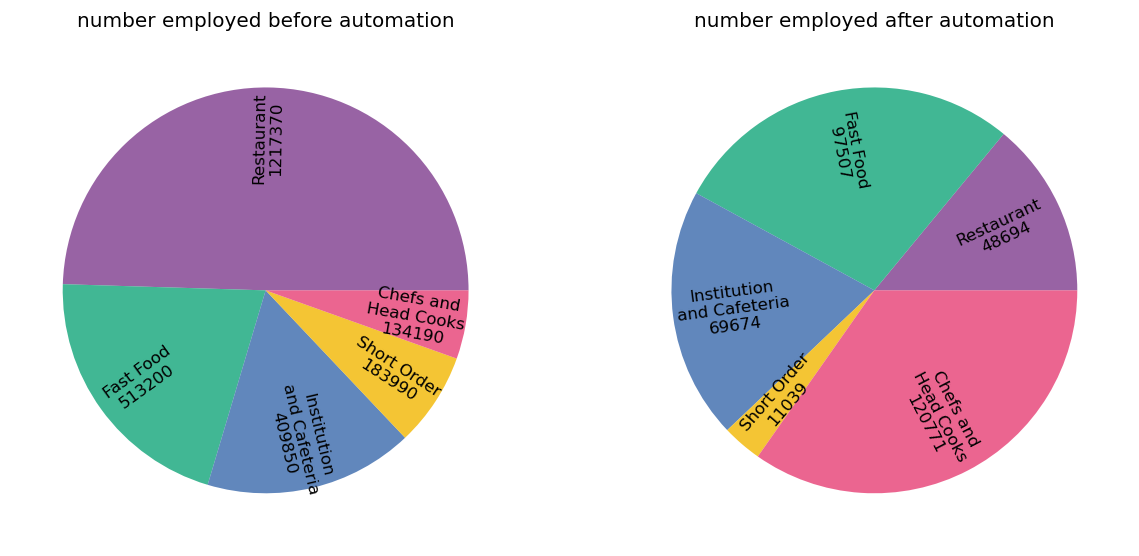

In [178]:
## make a bar chart

fig,axs = plt.subplots(nrows=1,ncols=2)


xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
        
ys = cook_dataset['numbEmployed'].values
ax = axs[0]
ax.set_title('number employed before automation')
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
ax.pie(ys,labels=these_labels,labeldistance=0.75,rotatelabels=True,
       textprops={'verticalalignment':'center','horizontalalignment':'center'},colors=colors[1::2])
ax = axs[1]
## set axis labels, etc.
ys = (cook_dataset['numbEmployed']*(1-cook_dataset['prob'])).values
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]

ax.pie(ys,labels=these_labels,labeldistance=0.7,rotatelabels=True,
      textprops={'verticalalignment':'center','horizontalalignment':'center'}
      ,colors=colors[1::2])

#ax.set_xticklabels(xlabels,rotation=-90)

ax.set_title('number employed after automation')
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.set_facecolor('white')

In [188]:
colors[-1] = 'C5'

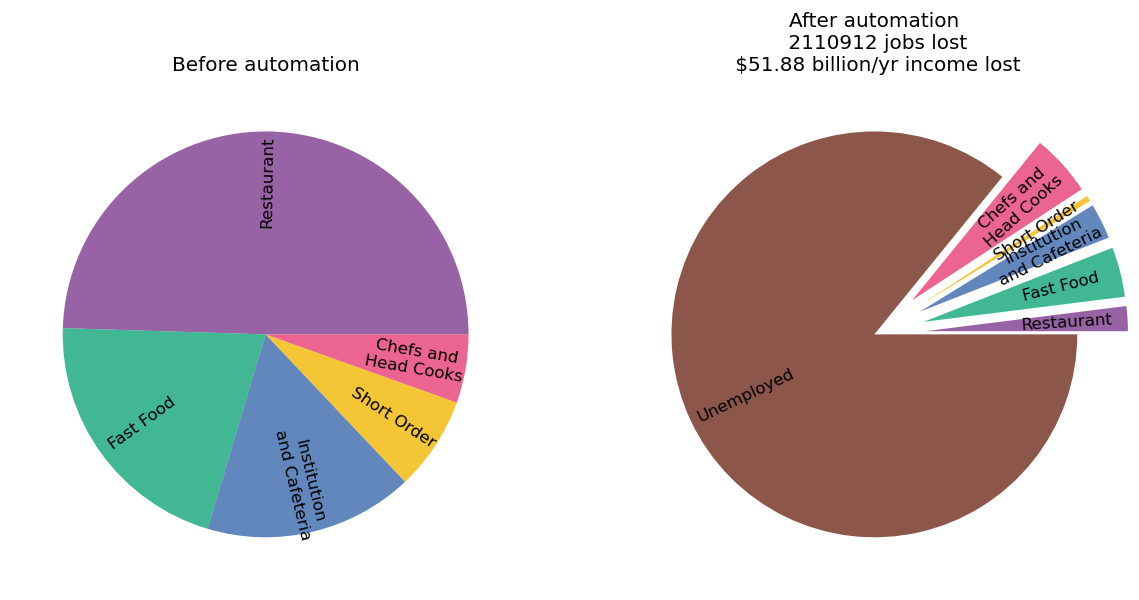

In [235]:
## make a bar chart

fig,axs = plt.subplots(nrows=1,ncols=2)


xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
        
ys = cook_dataset['numbEmployed'].values
ax = axs[0]
ax.set_title('Before automation')
these_labels = xlabels.tolist()
#these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
ax.pie(ys,labels=these_labels,labeldistance=0.75,rotatelabels=True,
       textprops={'verticalalignment':'center','horizontalalignment':'center'},colors=colors[1::2])
ax = axs[1]
## set axis labels, etc.
ys = (cook_dataset['numbEmployed']*(1-cook_dataset['prob'])).values
fired = np.sum(cook_dataset['numbEmployed'].values) - np.sum(ys)
ys = np.append(ys,fired)
#these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
these_labels = xlabels.tolist()
these_labels.append('Unemployed')#\n%d'%fired)

ax.pie(ys,labels=these_labels,labeldistance=0.7,rotatelabels=True,explode=[0.25]*5+[0],
      textprops={'verticalalignment':'center','horizontalalignment':'center'},colors=colors[1::2])

#ax.set_xticklabels(xlabels,rotation=-90)

ax.set_title('After automation\n %d jobs lost\n $%.2f billion/yr income lost'%(fired,np.sum(money)/1e9))
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.set_facecolor('white')

[0.         3.11063628 4.42197017 5.46922309 5.93935622 6.28223988
 6.28318531]
0.0
3.11063628161434
1.311333891688212
1.0472529140849849
0.4701331308100425
0.34288366119571556


Text(0, 0, '2,111,023 of 2,458,970 jobs are at risk (85%)')

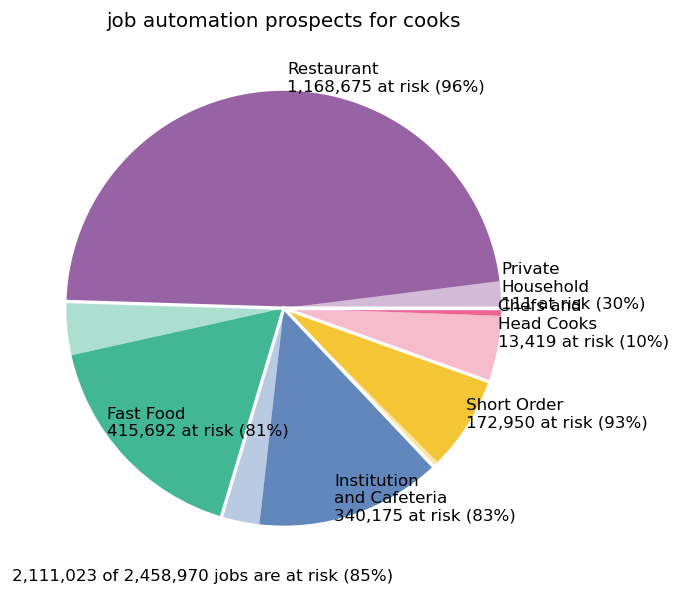

In [105]:
ax = plt.gca()
fig = plt.gcf()

ax.set_title('job automation prospects for cooks')

## set axis labels, etc.
#these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
n_employed = cook_dataset['numbEmployed'].values
probs = cook_dataset['prob'].values
xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
ys = []
colors = []
these_colors = np.array(Bold_6.colors)/255
thetas = [0]
for i,(n,prob) in enumerate(zip(n_employed,probs)):
    ys.append(n*(1-prob))
    ys.append(n*(prob))
    color = these_colors[i]
    colors.append([color[0],color[1],color[2],0.35])
    colors.append([color[0],color[1],color[2],0.8])
    
    thetas.append(360*np.sum(n_employed[:i+1])/np.sum(n_employed))
thetas = np.array(thetas)*np.pi/180
print(thetas)
theta_cs = (thetas[1:]+thetas[:-1])/2
safes,unsafes = ys[::2],ys[1::2]
safe,unsafe = sum(safes),sum(unsafes)

for i in range(len(xlabels)):
    xlabels[i]+= '\n{:,d} at risk ({:d}'.format(int(unsafes[i]),int(100*unsafes[i]/(safes[i]+unsafes[i])))+'%)'

patches,texts = ax.pie(ys,colors=colors,
    labeldistance=1.1,rotatelabels=True,
    textprops={'verticalalignment':'center','horizontalalignment':'center'})

theta_diffs = np.diff(np.append(0,thetas))
for i,theta in enumerate(theta_cs):
    dtheta=theta_diffs[i]
    print(dtheta)
    x,y = np.cos(theta),np.sin(theta)
    lx,ly = np.cos(thetas[i]),np.sin(thetas[i])
    ax.text(x,y,xlabels[i],)#rotation=theta/np.pi*180)
    ax.plot([0,lx],[0,ly],c='w',lw=2)
    


fig.set_size_inches(6,6)
fig.set_dpi(120)
fig.set_facecolor('white')

ax.text(0,0,'{:,d} of {:,d} jobs are at risk'.format(int(unsafe),int(safe+unsafe))+' (%d'%(100*unsafe/(safe+unsafe))+'%)',transform=ax.transAxes)

In [55]:
from matplotlib.colors import get_named_colors_mapping

In [58]:
from palettable.cartocolors.qualitative import Bold_6

In [57]:
import copy

In [90]:
thetas*180/np.pi

array([  0.        , 178.22633054, 253.36022806, 313.36340012,
       340.30004433, 359.94583098, 360.        ])

In [91]:
np.diff(thetas*180/np.pi).astype(int)

array([178,  75,  60,  26,  19,   0])